# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

### Assignments 1:
#### Find `Most Common Words` and create word cloud.

#### Read in the document-term matrix

In [ ]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.tail()

,EDGAR,FRANK,HENRY,MARY,RICHARD,VYVYAN,ZORA
zigzag,2,0,0,0,0,0,0
zil,0,0,0,0,1,0,0
zora,0,0,0,0,0,0,9
zorabut,0,0,0,0,0,0,1
ægipans,1,0,0,0,0,0,0


#### Find  and print the top 30 words said by each Author


In [ ]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'EDGAR': [('usher', 27),
  ('long', 22),
  ('house', 15),
  ('character', 13),
  ('certain', 12),
  ('family', 11),
  ('having', 11),
  ('portion', 11),
  ('said', 10),
  ('mind', 10),
  ('wild', 10),
  ('walls', 9),
  ('door', 9),
  ('words', 9),
  ('thought', 8),
  ('atmosphere', 8),
  ('tarn', 8),
  ('idea', 8),
  ('friend', 8),
  ('condition', 8),
  ('air', 8),
  ('low', 8),
  ('shall', 8),
  ('did', 8),
  ('countenance', 8),
  ('length', 8),
  ('lady', 7),
  ('hung', 7),
  ('came', 7),
  ('mansion', 7)],
 'FRANK': [('environmental', 9),
  ('arrakis', 9),
  ('ecological', 7),
  ('resource', 7),
  ('spice', 6),
  ('allegory', 6),
  ('herberts', 6),
  ('dune', 6),
  ('water', 5),
  ('consequences', 5),
  ('herbert', 5),
  ('readers', 4),
  ('planets', 4),
  ('exploitation', 4),
  ('challenges', 3),
  ('earths', 3),
  ('science', 3),
  ('fiction', 3),
  ('fremens', 3),
  ('environmentalism', 2),
  ('serves', 2),
  ('frank', 2),
  ('discipline', 2),
  ('visionary', 2),
  ('reflect', 2

In [ ]:
for Authors, top_words in top_dict.items():
    print(Authors)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

EDGAR
usher, long, house, character, certain, family, having, portion, said, mind, wild, walls, door, words
---
FRANK
environmental, arrakis, ecological, resource, spice, allegory, herberts, dune, water, consequences, herbert, readers, planets, exploitation
---
HENRY
life, man, let, live, men, news, like, think, know, things, read, reality, new, day
---
MARY
book, little, come, mccarthy, mean, understood, think, true, reality, having, meet, section, say, weekend
---
RICHARD
africa, alice, walker, black, white, olinka, nettie, walkers, color, purple, people, know, blacks, place
---
VYVYAN
wilde, oscar, play, wrote, life, book, wildes, years, time, fathers, importance, poems, published, douglas
---
ZORA
colored, zora, white, town, feel, great, bags, world, little, way, neale, brown, race, american
---


#### By looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that. Look at the most common top words and add them to the stop word list.



In [ ]:
from collections import Counter
common_words = []
for Authors in data.columns:
    top = [word for word, count in top_dict[Authors]]
    for t in top:
        common_words.append(t)

common_words

['usher',
 'long',
 'house',
 'character',
 'certain',
 'family',
 'having',
 'portion',
 'said',
 'mind',
 'wild',
 'walls',
 'door',
 'words',
 'thought',
 'atmosphere',
 'tarn',
 'idea',
 'friend',
 'condition',
 'air',
 'low',
 'shall',
 'did',
 'countenance',
 'length',
 'lady',
 'hung',
 'came',
 'mansion',
 'environmental',
 'arrakis',
 'ecological',
 'resource',
 'spice',
 'allegory',
 'herberts',
 'dune',
 'water',
 'consequences',
 'herbert',
 'readers',
 'planets',
 'exploitation',
 'challenges',
 'earths',
 'science',
 'fiction',
 'fremens',
 'environmentalism',
 'serves',
 'frank',
 'discipline',
 'visionary',
 'reflect',
 'sandworms',
 'impact',
 'melange',
 'narrative',
 'struggles',
 'life',
 'man',
 'let',
 'live',
 'men',
 'news',
 'like',
 'think',
 'know',
 'things',
 'read',
 'reality',
 'new',
 'day',
 'time',
 'say',
 'state',
 'worthy',
 'true',
 'thoreau',
 'messenger',
 'petty',
 'way',
 'walden',
 'run',
 'sleepers',
 'did',
 'lived',
 'great',
 'work',
 'boo

#### Let's aggregate this list and identify the most common words along with how many routines they occur in


In [ ]:
Counter(common_words).most_common()



[('certain', 3),
 ('words', 3),
 ('like', 3),
 ('know', 3),
 ('time', 3),
 ('say', 3),
 ('great', 3),
 ('book', 3),
 ('having', 2),
 ('said', 2),
 ('thought', 2),
 ('did', 2),
 ('lady', 2),
 ('life', 2),
 ('man', 2),
 ('men', 2),
 ('think', 2),
 ('things', 2),
 ('reality', 2),
 ('true', 2),
 ('way', 2),
 ('little', 2),
 ('novel', 2),
 ('white', 2),
 ('people', 2),
 ('place', 2),
 ('years', 2),
 ('american', 2),
 ('usher', 1),
 ('long', 1),
 ('house', 1),
 ('character', 1),
 ('family', 1),
 ('portion', 1),
 ('mind', 1),
 ('wild', 1),
 ('walls', 1),
 ('door', 1),
 ('atmosphere', 1),
 ('tarn', 1),
 ('idea', 1),
 ('friend', 1),
 ('condition', 1),
 ('air', 1),
 ('low', 1),
 ('shall', 1),
 ('countenance', 1),
 ('length', 1),
 ('hung', 1),
 ('came', 1),
 ('mansion', 1),
 ('environmental', 1),
 ('arrakis', 1),
 ('ecological', 1),
 ('resource', 1),
 ('spice', 1),
 ('allegory', 1),
 ('herberts', 1),
 ('dune', 1),
 ('water', 1),
 ('consequences', 1),
 ('herbert', 1),
 ('readers', 1),
 ('planets',

#### If more than half of the comedians have it as a top word, exclude it from the list


In [ ]:
add_stop_words = [word for word, count in Counter(common_words).most_common() if count > 2]
add_stop_words

['certain', 'words', 'like', 'know', 'time', 'say', 'great', 'book']

In [ ]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = list(text.ENGLISH_STOP_WORDS) + add_stop_words

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [ ]:
data_stop

,abandon,abeyance,abhorrence,ability,able,abroad,abrupt,abruptly,absolute,absolutely,...,young,younger,youp,youth,youve,zigzag,zil,zora,zorabut,ægipans
EDGAR,2,1,1,0,0,1,1,3,1,0,...,0,0,0,1,0,2,0,0,0,1
FRANK,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HENRY,0,0,0,0,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
MARY,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
RICHARD,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,0,0,0
VYVYAN,0,0,0,0,0,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,0
ZORA,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,9,1,0


In [ ]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words,background_color="black",  colormap="viridis",max_font_size=100, random_state=42)



In [ ]:
import pprint
pprint.pprint(data_clean.transcript['HENRY'])

(' henry david thoreau was born in  and raised in concord massachusetts living '
 'there for most of his life along with ralph waldo emerson thoreau was one of '
 'the most important thinkers of his time in america and is still widely read '
 'today walden  the work for which he is best known is drawn from the journal '
 'he kept during his twoyearlong stay in a cabin on walden pond in walden '
 'thoreau explores his interests in naturalism individualism and '
 'selfsufficiency he is also remembered for his essay civil disobedience  an '
 'early influential statement of this tactic of protest later practiced by '
 'mahatma gandhi and under the leadership of martin luther king jr many in the '
 'civil rights movementwhere i lived and what i lived for is taken from walden '
 'in it thoreau makes the argument for his going to live in the woods writing '
 'about walden scholars have pointed out that thoreau was not particularly '
 'deep in the woods and that he was regularly visited and su

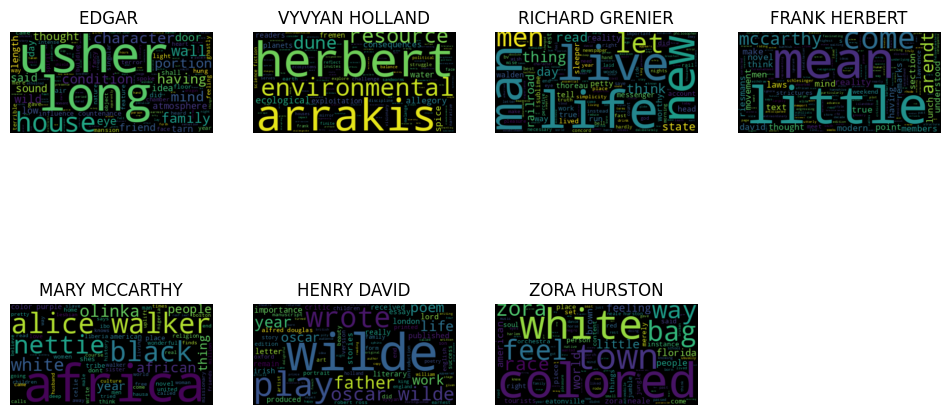

In [ ]:
# Reset the output dimensions
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [12,10]

full_names=['EDGAR ','VYVYAN HOLLAND','RICHARD GRENIER','FRANK HERBERT','MARY MCCARTHY','HENRY DAVID','ZORA HURSTON']



# Create subplots for each comedian

for index, Authors in enumerate(data.columns):
    if(data_clean.transcript[Authors]!=''):
        wc.generate(data_clean.transcript[Authors])
        plt.subplot(3, 4, index+1)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(full_names[index])

plt.show()


#### You observations
1. Richard Grenier talks alot about LIFE.
2. Mary Mccarthy discuss alot about Africa
3.Vyvyan Holland uses unique words like herbert and arrakis.

### Assignment 2:
#### Find the number of unique words that each comedian uses.

In [ ]:
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for Authors in data.columns:
    uniques = data[Authors].to_numpy().nonzero()[0].size
    unique_list.append(uniques)


# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['Authors', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,Authors,unique_words
1,VYVYAN HOLLAND,210
3,FRANK HERBERT,263
6,ZORA HURSTON,579
4,MARY MCCARTHY,711
2,RICHARD GRENIER,858
5,HENRY DAVID,906
0,EDGAR,2007


In [ ]:
import random

# List of authors
authors = ['EDGAR ', 'VYVYAN HOLLAND', 'RICHARD GRENIER', 'FRANK HERBERT', 'MARY MCCARTHY', 'HENRY DAVID', 'ZORA HURSTON']

# Generate random runtimes for each author
random_runtimes = [random.randint(40, 120) for _ in range(len(authors))]

for author, runtime in zip(authors, random_runtimes):
    print(f"{author}: {runtime} minutes")


EDGAR : 70 minutes
VYVYAN HOLLAND: 111 minutes
RICHARD GRENIER: 114 minutes
FRANK HERBERT: 55 minutes
MARY MCCARTHY: 66 minutes
HENRY DAVID: 116 minutes
ZORA HURSTON: 93 minutes


In [ ]:
# Calculate the words per minute of each Authors
# Find the total number of words that a Authors uses
total_list = []
for Authors in data.columns:
    totals = sum(data[Authors])
    total_list.append(totals)

# Author special reading time of articles, in minutes
run_times = [35, 14, 10, 22, 26, 32, 20]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,Authors,unique_words,total_words,run_times,words_per_minute
3,FRANK HERBERT,263,303,22,13.772727
1,VYVYAN HOLLAND,210,310,14,22.142857
6,ZORA HURSTON,579,769,20,38.450000
4,MARY MCCARTHY,711,1104,26,42.461538
5,HENRY DAVID,906,1374,32,42.937500
0,EDGAR,2007,3260,35,93.142857
2,RICHARD GRENIER,858,1230,10,123.000000


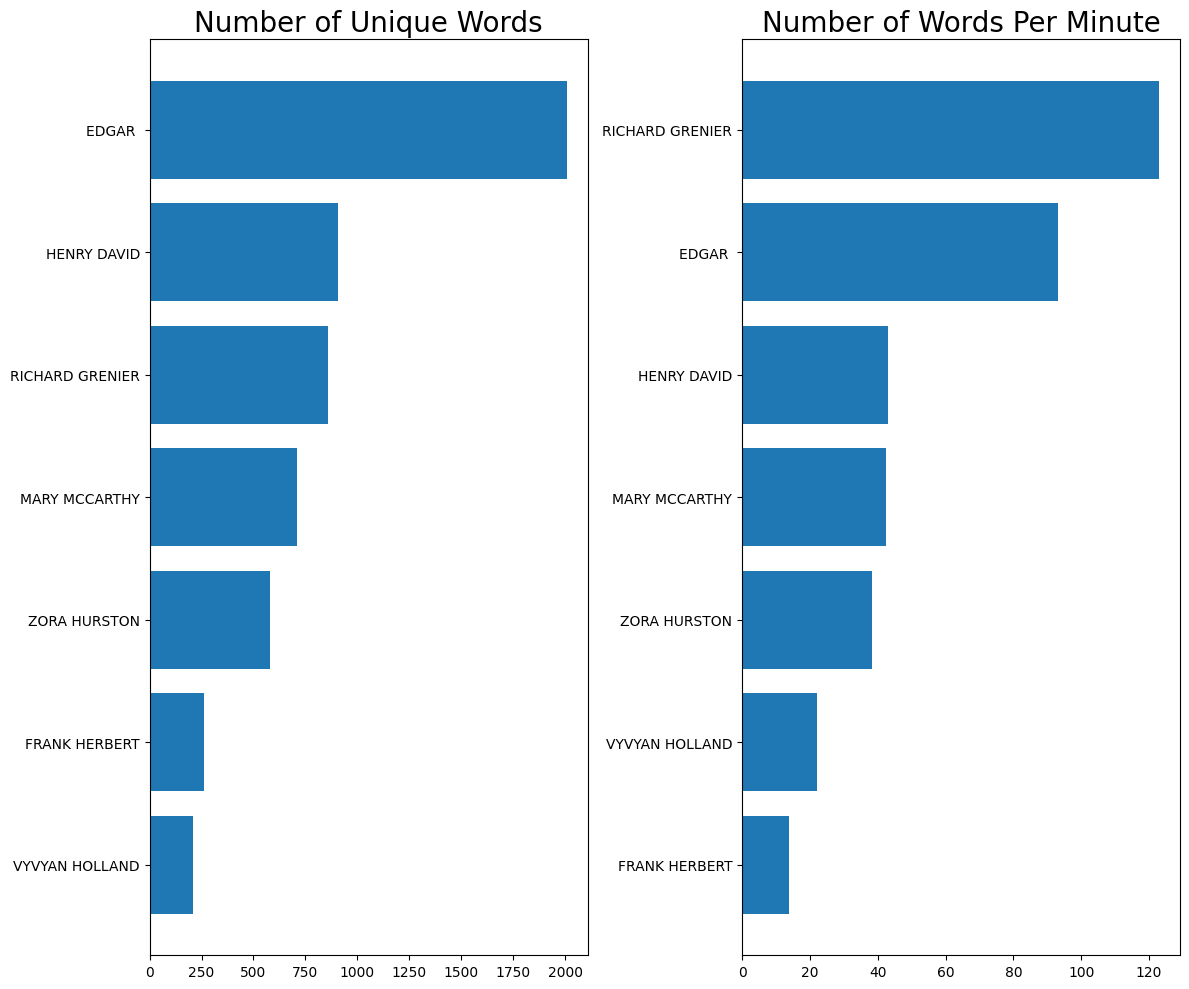

In [ ]:
# plot our findings

import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.Authors)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.Authors)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

#### Write your findings. For example:
* **Vocabulary**
   * Edgar and Henry david use a lot of words in their comedy
   * Frank herbert and Vyvyan Holland have a smaller vocabulary


* **Talking Speed**
   * Edgar and Richard Grenier talk fast
   * Frank Herbert and Vvyan Holland talk slow
   
Zora Hurston is somewhere in the middle in both cases. Nothing too interesting here.

### Assignment 3:
#### Check the profanity by analysing the common bad words, like `fucking`, `fuck`, `shit etc.

In [ ]:
# take a look at the most common words.
Counter(common_words).most_common()

[('certain', 3),
 ('words', 3),
 ('like', 3),
 ('know', 3),
 ('time', 3),
 ('say', 3),
 ('great', 3),
 ('book', 3),
 ('having', 2),
 ('said', 2),
 ('thought', 2),
 ('did', 2),
 ('lady', 2),
 ('life', 2),
 ('man', 2),
 ('men', 2),
 ('think', 2),
 ('things', 2),
 ('reality', 2),
 ('true', 2),
 ('way', 2),
 ('little', 2),
 ('novel', 2),
 ('white', 2),
 ('people', 2),
 ('place', 2),
 ('years', 2),
 ('american', 2),
 ('usher', 1),
 ('long', 1),
 ('house', 1),
 ('character', 1),
 ('family', 1),
 ('portion', 1),
 ('mind', 1),
 ('wild', 1),
 ('walls', 1),
 ('door', 1),
 ('atmosphere', 1),
 ('tarn', 1),
 ('idea', 1),
 ('friend', 1),
 ('condition', 1),
 ('air', 1),
 ('low', 1),
 ('shall', 1),
 ('countenance', 1),
 ('length', 1),
 ('hung', 1),
 ('came', 1),
 ('mansion', 1),
 ('environmental', 1),
 ('arrakis', 1),
 ('ecological', 1),
 ('resource', 1),
 ('spice', 1),
 ('allegory', 1),
 ('herberts', 1),
 ('dune', 1),
 ('water', 1),
 ('consequences', 1),
 ('herbert', 1),
 ('readers', 1),
 ('planets',

In [ ]:
# isolate just these racial words
data_bad_words = data.transpose()[['black','blacks', 'white','brown' ,'race','africans','religion']]
data_profanity = pd.concat([data_bad_words.black + data_bad_words.white+ data_bad_words.brown+data_bad_words.blacks, data_bad_words.race+data_bad_words.africans+data_bad_words.religion], axis=1)
data_profanity.columns = ['Color', 'Race']
data_profanity

,Color,Race
EDGAR,5,2
FRANK,0,0
HENRY,0,2
MARY,0,0
RICHARD,29,8
VYVYAN,1,0
ZORA,13,4


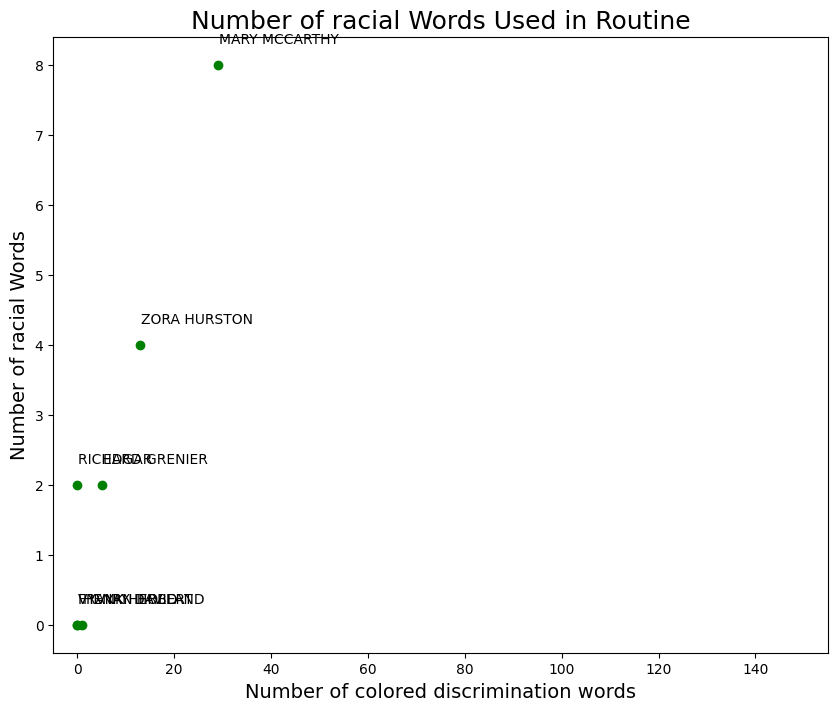

In [ ]:
# create a scatter plot of your findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, Authors in enumerate(data_profanity.index):
    x = data_profanity.Color.loc[Authors]
    y = data_profanity.Race.loc[Authors]
    plt.scatter(x, y, color='green')
    plt.text(x+0.2, y+0.3, full_names[i], fontsize=10)
    plt.xlim(-5, 155)

plt.title('Number of racial Words Used in Routine', fontsize=18)
plt.xlabel('Number of colored discrimination words', fontsize=14)
plt.ylabel('Number of racial Words', fontsize=14)

plt.show()

### Write your findings.
#### For example:
* I don't like to discriminate on basis of black and white hence I have read Zora Hurston who makes people aware about it and I like Mary and Frank as they don't use such things in wrong way.
* **Using these words to discriminate** - Richard is not my favourite as it used this for not soreading awareness.

### Assignment 4:(optional)
What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

We can look at motivational things that these authors write in their articles.

In [ ]:
data_motivational = data.transpose()[['work','discipline','reflect','great','importance','character']]
data_profanity2 = pd.concat([data_motivational.work+data_motivational.discipline+data_motivational.importance , data_motivational.character+data_motivational.great+data_motivational.reflect], axis=1)
data_profanity2.columns = ['Discipline', 'Personality']
data_profanity2

,Discipline,Personality
EDGAR,2,17
FRANK,3,2
HENRY,4,7
MARY,1,2
RICHARD,2,2
VYVYAN,11,1
ZORA,1,5


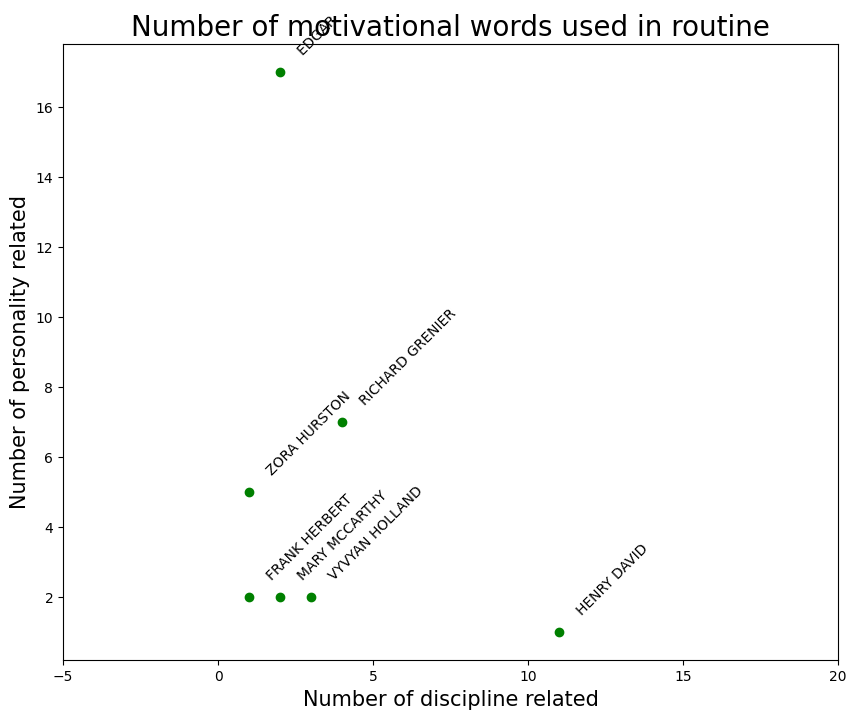

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]

for i, Authors in enumerate(data_profanity2.index):
    x = data_profanity2.Discipline.loc[Authors]
    y = data_profanity2.Personality.loc[Authors]
    plt.scatter(x, y, color='green')
    plt.text(x+.5, y+0.5, full_names[i], fontsize=10,rotation=45)
    plt.xlim(-5, 20)

plt.title('Number of motivational words used in routine', fontsize=20)
plt.xlabel('Number of discipline related', fontsize=15)
plt.ylabel('Number of personality related', fontsize=15)

plt.show()